In [ ]:
!pip install pyecharts==0.5.11

In [ ]:
# 기본 패키지 불러오기

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import pyecharts
import folium 
from folium import plugins

from pyecharts import Pie, Line, Geo, GeoLines, Style, online
online()

pd.set_option("display.max_rows", 100)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# csv 파일 불러오기 csv 파일 불러오기

Case=pd.read_csv("/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/Case.csv")
PatientInfo=pd.read_csv("/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/PatientInfo.csv")
PatientRoute=pd.read_csv("/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/PatientRoute.csv")
Region=pd.read_csv("/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/Region.csv")
SeoulFloating=pd.read_csv("/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/SeoulFloating.csv")
Time=pd.read_csv("/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/Time.csv")
TimeAge=pd.read_csv("/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/TimeAge.csv")
TimeGender=pd.read_csv("/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/TimeGender.csv")
TimeProvince=pd.read_csv("/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/TimeProvince.csv")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



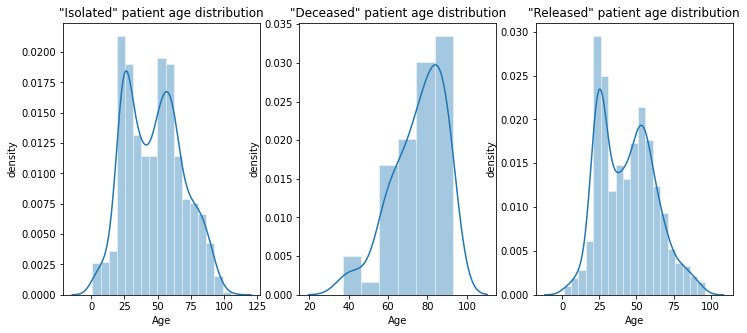

In [ ]:
# 나이별 환자 상태 분석

PatientInfo['age_2020'] = 2020 - PatientInfo['birth_year'] + 1 # 환자들 나이 구하기

release = PatientInfo.query('state == "released"') # 조건 부합 데이터 추출 (환자 상태가 released)
isolate = PatientInfo.query('state == "isolated"') # 조건 부합 데이터 추출 (환자 상태가 isolate)
decease = PatientInfo.query('state == "deceased"') # 조건 부합 데이터 추출 (환자 상태가 decease)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3) # plot 1행 3열
fig.set_size_inches(12,5)  # plot 크기

sns.set_style("darkgrid") # plot의 그래프 grid 그리기
sns.distplot(isolate['age_2020'].dropna(), ax = ax1) # 첫 번째 plot - 환자 상태가 isolate인 그래프 display  
ax1.set(title = '"Isolated" patient age distribution',xlabel = 'Age', ylabel = 'density')  # Plot 제목, x, y label 설정

sns.set_style("darkgrid")
sns.distplot(decease['age_2020'].dropna(), ax = ax2) # 두 번째 plot - 환자 상태가 decease인 그래프 display    
ax2.set(title = '"Deceased" patient age distribution', xlabel = 'Age', ylabel = 'density')

sns.set_style("darkgrid")
sns.distplot(release['age_2020'].dropna(), ax = ax3) # 세 번째 plot - 환자 상태가 release인 그래프 display 
ax3.set(title = '"Released" patient age distribution', xlabel = 'Age', ylabel = 'density')

plt.show()

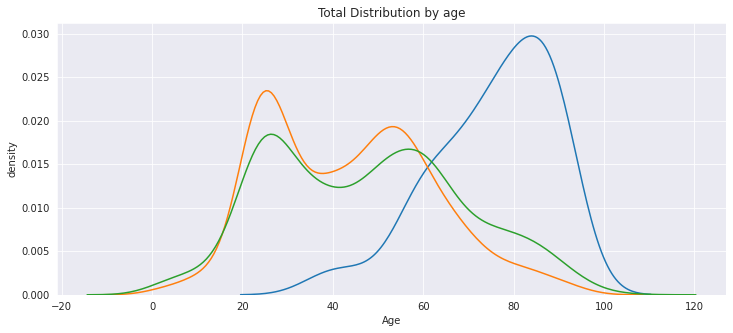

In [ ]:
plt.figure(figsize = (12,5))
sns.set_style("darkgrid")
sns.kdeplot(decease['age_2020'].dropna(), label = 'deceased')
sns.kdeplot(release['age_2020'].dropna(), label = 'released')
sns.kdeplot(isolate['age_2020'].dropna(), label = 'isolated')
plt.title('Total Distribution by age')
plt.xlabel('Age'); plt.ylabel('density')
plt.show()

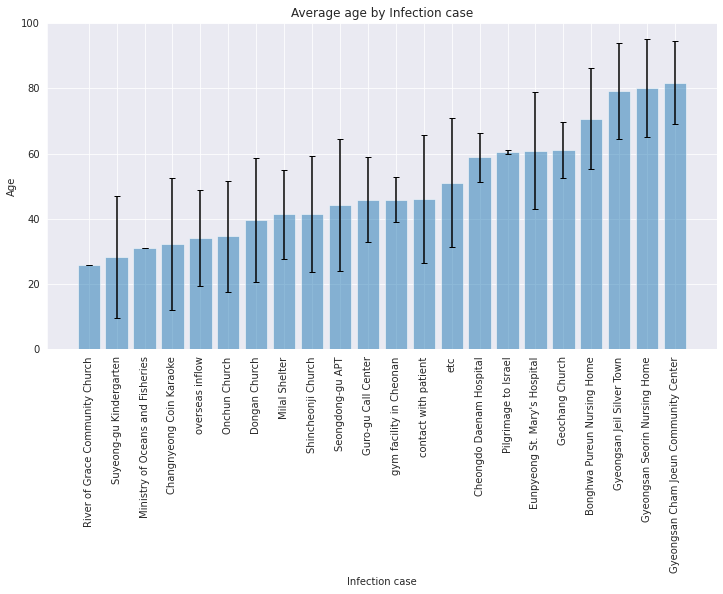

In [ ]:
age_by_infection_case = PatientInfo[['infection_case','age_2020']].dropna()\
.groupby('infection_case')['age_2020']\
.agg(['mean', 'std']).fillna(0)\
.sort_values('mean')

plt.figure(figsize = (12,6))
plt.bar(x = age_by_infection_case.index,
        yerr = age_by_infection_case['std'],
        height = age_by_infection_case['mean'],
        alpha = 0.5, ecolor = 'black', capsize = 3)
plt.xticks(rotation=90)
plt.title('Average age by Infection case')
plt.ylabel('Age'); plt.xlabel('Infection case')
plt.show()

del age_by_infection_case

In [ ]:
info_all = PatientInfo[PatientInfo.age !='']
info_high = PatientInfo[PatientInfo.age >'50s'] # 50대 이상

In [ ]:
info_all['infection_case'] = info_all['infection_case'].fillna("NA")

info_all = info_all.sort_values(by=['confirmed_date'], axis=0)
counts = pd.get_dummies(info_all['infection_case']).cumsum()
counts = info_all[["confirmed_date","infection_case"]].join(counts)

counts["summary_infect"] = [ list(counts[list(counts.infection_case)[i]])[i] for i in range(0, len(counts)) ]
counts = counts.drop_duplicates(["confirmed_date","infection_case"], keep="last")
counts = counts.sort_values(by=['confirmed_date'], axis=0)

In [ ]:
fig = go.Figure()
fig = px.line(counts, x='confirmed_date', y='summary_infect',
              color="infection_case",
              line_group="infection_case", hover_name="infection_case")
fig.update_layout(title='All age infection_case' , showlegend=True)

fig.show()

In [ ]:
info_high['infection_case'] = info_high['infection_case'].fillna("NA")

info_high = info_high.sort_values(by=['confirmed_date'], axis=0)
counts = pd.get_dummies(info_high['infection_case']).cumsum()
counts = info_high[["confirmed_date","infection_case"]].join(counts)

counts["summary_infect"] = [ list(counts[list(counts.infection_case)[i]])[i] for i in range(0, len(counts)) ]
counts = counts.drop_duplicates(["confirmed_date","infection_case"], keep="last")
counts = counts.sort_values(by=['confirmed_date'], axis=0)

fig = go.Figure()
fig = px.line(counts, x='confirmed_date', y='summary_infect',
              color="infection_case",
              line_group="infection_case", hover_name="infection_case")
fig.update_layout(title='higher than 50s' , showlegend=True)

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

